In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import os

2024-10-11 10:49:35.463637: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-11 10:49:35.694502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 10:49:36.231912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
base_dir = os.path.join('face_mask/Face Mask Dataset/')

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28,28),
    color_mode='grayscale',
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


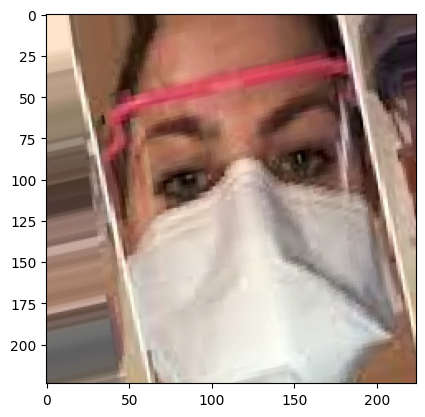

In [4]:
image_path_mask = os.path.join(train_dir, 'WithMask')
mask_train_list = os.listdir(image_path_mask)

import matplotlib.image as mpi
plt.imshow(mpi.imread(os.path.join(image_path_mask, mask_train_list[0])))

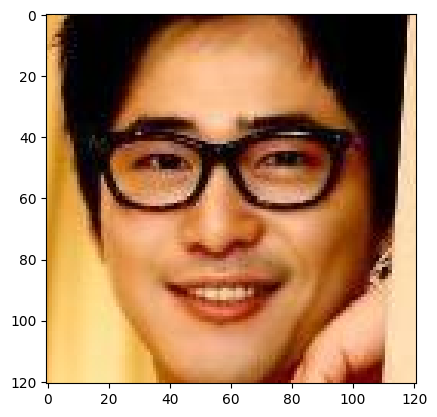

In [5]:
image_path_nomask = os.path.join(train_dir, 'WithoutMask')
nomask_train_list = os.listdir(image_path_nomask)

import matplotlib.image as mpi
plt.imshow(mpi.imread(os.path.join(image_path_nomask, nomask_train_list[0])))

## LeNet Implementation

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1), name='InputLayer'))
model.add(keras.layers.Conv2D(6, (5,5), padding='same', strides=(1,1), name='ConvLayer1', activation='tanh'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), name='PoolLayer1'))
model.add(keras.layers.Conv2D(16, (5,5), padding='valid', strides=(1,1), name='ConvLayer2', activation='tanh'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), name='PoolLayer2'))
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(120, activation='sigmoid', name='DenseLayer1'))
model.add(keras.layers.Dense(84, activation='sigmoid', name='DenseLayer2'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 14, 14, 6)         0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 5, 5, 16)          0         
                                                                 
 FlattenLayer (Flatten)      (None, 400)               0         
                                                                 
 DenseLayer1 (Dense)         (None, 120)               48120     
                                                                 
 DenseLayer2 (Dense)         (None, 84)                1

2024-10-11 10:49:37.304832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-11 10:49:37.380355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-11 10:49:37.380455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [8]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10


2024-10-11 10:49:39.319870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-10-11 10:49:40.060937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-11 10:49:40.073343: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4606f8a3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-11 10:49:40.073357: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-11 10:49:40.083149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-11 10:49:40.183038: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

313/313 [==============================] - 10s 21ms/step - loss: 0.6775 - acc: 0.6539 - val_loss: 0.6388 - val_acc: 0.7987
Epoch 2/10
313/313 [==============================] - 6s 20ms/step - loss: 0.5168 - acc: 0.8258 - val_loss: 0.4143 - val_acc: 0.8612
Epoch 3/10
313/313 [==============================] - 6s 21ms/step - loss: 0.3220 - acc: 0.8824 - val_loss: 0.3123 - val_acc: 0.8825
Epoch 4/10
313/313 [==============================] - 6s 20ms/step - loss: 0.2504 - acc: 0.9026 - val_loss: 0.2748 - val_acc: 0.8950
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.2193 - acc: 0.9138 - val_loss: 0.2558 - val_acc: 0.9038
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.2013 - acc: 0.9204 - val_loss: 0.2410 - val_acc: 0.9100
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1890 - acc: 0.9249 - val_loss: 0.2313 - val_acc: 0.9100
Epoch 8/10
313/313 [==============================] - 6s 20ms/step - loss: 0.17

In [9]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']

epochs = ([i for i in range(1,11)])

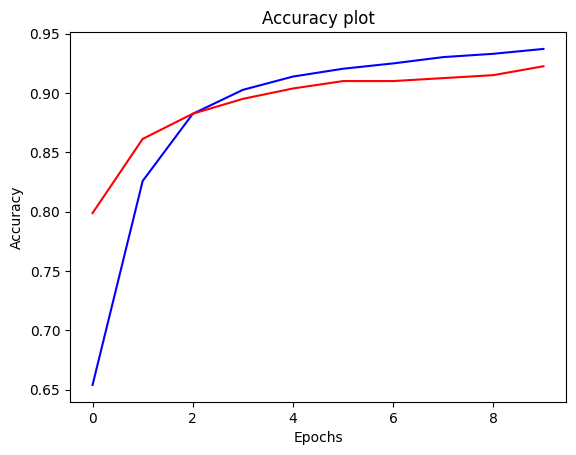

In [10]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

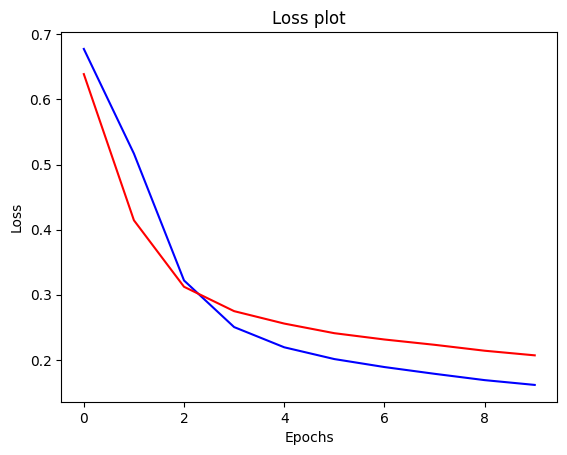

In [11]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

## AlexNet Implementation

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(keras.layers.Conv2D(96, (11,11), strides=(4,4), padding='valid', activation='relu', name='ConvLayer1'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer1'))
model.add(keras.layers.Conv2D(256, (5,5), padding='same', activation='relu', name='ConvLayer2'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer2'))
model.add(keras.layers.Conv2D(384, (3,3), padding='same', activation='relu', name='ConvLayer3'))
model.add(keras.layers.Conv2D(384, (3,3), padding='same', activation='relu', name='ConvLayer4'))
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', name='ConvLayer5'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), name='PoolLayer3'))
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(4096, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 26, 26, 96)        0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 12, 12, 256)       0         
                                                                 
 ConvLayer3 (Conv2D)         (None, 12, 12, 384)       885120    
                                                                 
 ConvLayer4 (Conv2D)         (None, 12, 12, 384)       1327488   
                                                                 
 ConvLayer5 (Conv2D)         (None, 12, 12, 256)      

In [15]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [16]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 12s 31ms/step - loss: 0.1993 - acc: 0.9192 - val_loss: 0.0724 - val_acc: 0.9800
Epoch 2/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0804 - acc: 0.9700 - val_loss: 0.0345 - val_acc: 0.9925
Epoch 3/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0458 - acc: 0.9843 - val_loss: 0.0295 - val_acc: 0.9900
Epoch 4/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0333 - acc: 0.9889 - val_loss: 0.0420 - val_acc: 0.9875
Epoch 5/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0324 - acc: 0.9893 - val_loss: 0.0319 - val_acc: 0.9900
Epoch 6/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0228 - acc: 0.9924 - val_loss: 0.0702 - val_acc: 0.9725
Epoch 7/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0224 - acc: 0.9918 - val_loss: 0.0157 - val_acc: 0.9950
Epoch 8/10
313/313 [==============================] - 9s 28ms/step -

In [17]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

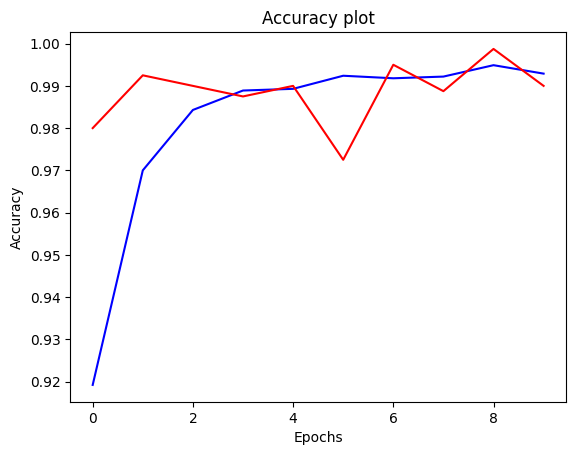

In [18]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

## VGG16 Implementation

In [19]:
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.trainable=False

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 FlattenLayer (Flatten)      (None, 25088)             0         
                                                                 
 DenseLayer1 (Dense)         (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 DenseLayer2 (Dense)         (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 OutputLayer (Dense)         (None, 1)                

In [21]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [22]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 33s 101ms/step - loss: 0.1144 - acc: 0.9545 - val_loss: 0.0180 - val_acc: 0.9937
Epoch 2/10
313/313 [==============================] - 31s 98ms/step - loss: 0.0329 - acc: 0.9888 - val_loss: 0.0130 - val_acc: 0.9950
Epoch 3/10
313/313 [==============================] - 31s 99ms/step - loss: 0.0208 - acc: 0.9931 - val_loss: 0.0096 - val_acc: 0.9950
Epoch 4/10
313/313 [==============================] - 31s 99ms/step - loss: 0.0182 - acc: 0.9933 - val_loss: 0.0076 - val_acc: 0.9975
Epoch 5/10
313/313 [==============================] - 31s 99ms/step - loss: 0.0112 - acc: 0.9960 - val_loss: 0.0081 - val_acc: 0.9962
Epoch 6/10
313/313 [==============================] - 31s 99ms/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0137 - val_acc: 0.9950
Epoch 7/10
313/313 [==============================] - 31s 100ms/step - loss: 0.0101 - acc: 0.9964 - val_loss: 0.0065 - val_acc: 0.9975
Epoch 8/10
313/313 [==============================] - 31s 99

In [23]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

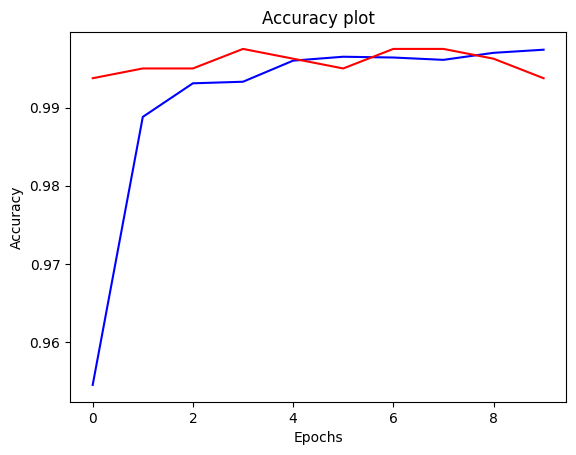

In [24]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

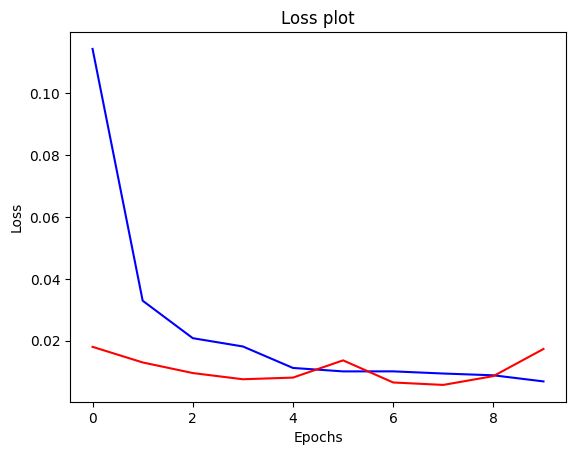

In [25]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

## ResNet50 Implementation

In [26]:
base_model = keras.applications.ResNet50(include_top=False, weights='imagenet')
base_model.trainable=False

94765736/94765736 [==============================] - 7s 0us/step


In [27]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 FlattenLayer (Flatten)      (None, 100352)            0         
                                                                 
 DenseLayer1 (Dense)         (None, 256)               25690368  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 DenseLayer2 (Dense)         (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [28]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [29]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 26s 77ms/step - loss: 0.6986 - acc: 0.5720 - val_loss: 0.6292 - val_acc: 0.7250
Epoch 2/10
313/313 [==============================] - 23s 74ms/step - loss: 0.6212 - acc: 0.6731 - val_loss: 0.5799 - val_acc: 0.8000
Epoch 3/10
313/313 [==============================] - 23s 74ms/step - loss: 0.5614 - acc: 0.7516 - val_loss: 0.4970 - val_acc: 0.8350
Epoch 4/10
313/313 [==============================] - 23s 73ms/step - loss: 0.4999 - acc: 0.8114 - val_loss: 0.4258 - val_acc: 0.9137
Epoch 5/10
313/313 [==============================] - 23s 73ms/step - loss: 0.4434 - acc: 0.8451 - val_loss: 0.3592 - val_acc: 0.9287
Epoch 6/10
313/313 [==============================] - 23s 73ms/step - loss: 0.4221 - acc: 0.8451 - val_loss: 0.3632 - val_acc: 0.9162
Epoch 7/10
313/313 [==============================] - 23s 73ms/step - loss: 0.4029 - acc: 0.8460 - val_loss: 0.3042 - val_acc: 0.9350
Epoch 8/10
313/313 [==============================] - 23s 73ms

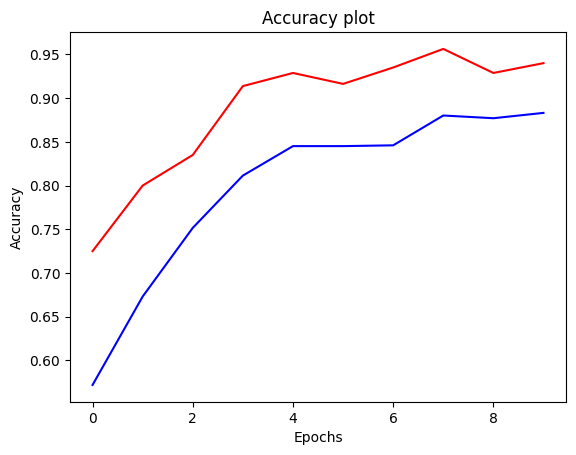

In [30]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

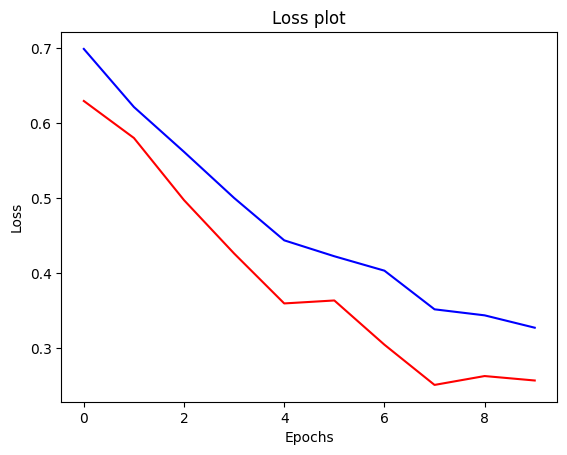

In [31]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

## InceptionV3 Implemenation

In [32]:
base_model = keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.trainable=False

87910968/87910968 [==============================] - 7s 0us/step


In [33]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 FlattenLayer (Flatten)      (None, 51200)             0         
                                                                 
 DenseLayer1 (Dense)         (None, 256)               13107456  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 DenseLayer2 (Dense)         (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                      

In [34]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [35]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 18s 47ms/step - loss: 0.0618 - acc: 0.9839 - val_loss: 0.0085 - val_acc: 0.9987
Epoch 2/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0295 - acc: 0.9935 - val_loss: 0.0067 - val_acc: 0.9987
Epoch 3/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0257 - acc: 0.9953 - val_loss: 0.0037 - val_acc: 0.9975
Epoch 4/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0162 - acc: 0.9962 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 5/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0115 - acc: 0.9968 - val_loss: 0.0070 - val_acc: 0.9987
Epoch 6/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0125 - acc: 0.9978 - val_loss: 0.0057 - val_acc: 0.9987
Epoch 7/10
313/313 [==============================] - 13s 42ms/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0071 - val_acc: 0.9975
Epoch 8/10
313/313 [==============================] - 13s 41ms

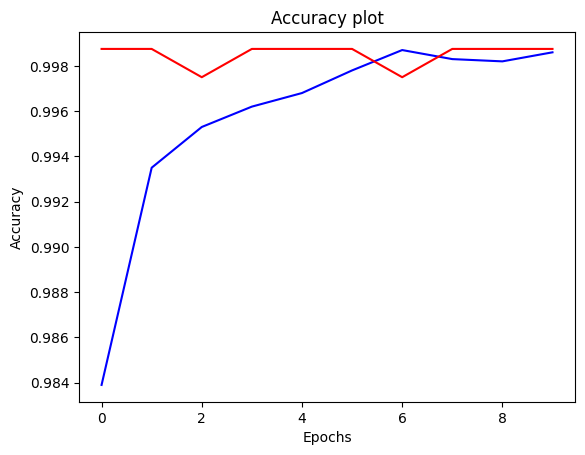

In [36]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

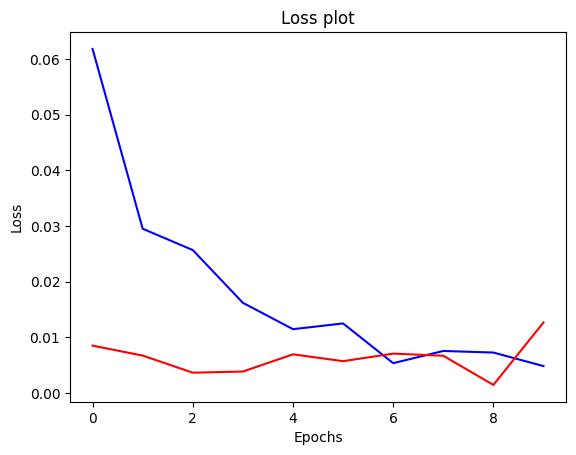

In [37]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

## EfficientNetB0 Implementation

In [38]:
base_model = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
base_model.trainable=False

16705208/16705208 [==============================] - 3s 0us/step


In [39]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 FlattenLayer (Flatten)      (None, 62720)             0         
                                                                 
 DenseLayer1 (Dense)         (None, 256)               16056576  
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 DenseLayer2 (Dense)         (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                      

In [40]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [41]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 19s 51ms/step - loss: 0.7227 - acc: 0.4976 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
313/313 [==============================] - 15s 49ms/step - loss: 0.6932 - acc: 0.4942 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
313/313 [==============================] - 15s 49ms/step - loss: 0.6931 - acc: 0.5048 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
313/313 [==============================] - 15s 49ms/step - loss: 0.6932 - acc: 0.4954 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
313/313 [==============================] - 15s 48ms/step - loss: 0.6932 - acc: 0.4983 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/10
313/313 [==============================] - 15s 49ms/step - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
313/313 [==============================] - 15s 49ms/step - loss: 0.6932 - acc: 0.4967 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/10
313/313 [==============================] - 15s 49ms

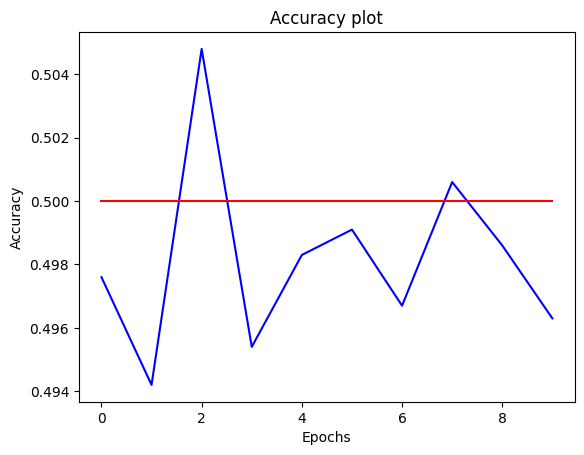

In [42]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

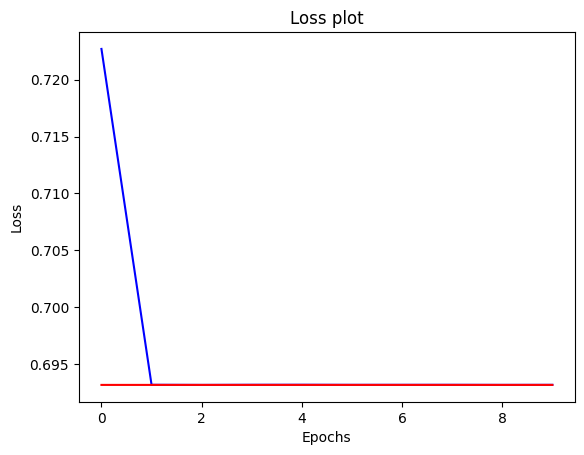

In [43]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()

## MobileNetV2 Implementation

In [44]:
base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet')
base_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [45]:
model = keras.Sequential()
model.add(keras.Input(shape=(224,224,3), name='InputLayer'))
model.add(base_model)
model.add(keras.layers.Flatten(name='FlattenLayer'))
model.add(keras.layers.Dense(256, activation='relu', name='DenseLayer1'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', name='DenseLayer2'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 FlattenLayer (Flatten)      (None, 62720)             0         
                                                                 
 DenseLayer1 (Dense)         (None, 256)               16056576  
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 DenseLayer2 (Dense)         (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                      

In [46]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [47]:
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=valid_generator)

Epoch 1/10
313/313 [==============================] - 12s 34ms/step - loss: 0.1004 - acc: 0.9696 - val_loss: 0.0186 - val_acc: 0.9925
Epoch 2/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0349 - acc: 0.9880 - val_loss: 0.0105 - val_acc: 0.9962
Epoch 3/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0244 - val_acc: 0.9912
Epoch 4/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0164 - acc: 0.9953 - val_loss: 0.0086 - val_acc: 0.9962
Epoch 5/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0152 - acc: 0.9956 - val_loss: 0.0162 - val_acc: 0.9962
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0094 - acc: 0.9968 - val_loss: 0.0245 - val_acc: 0.9950
Epoch 7/10
313/313 [==============================] - 10s 33ms/step - loss: 0.0102 - acc: 0.9972 - val_loss: 0.0233 - val_acc: 0.9950
Epoch 8/10
313/313 [==============================] - 10s 33ms

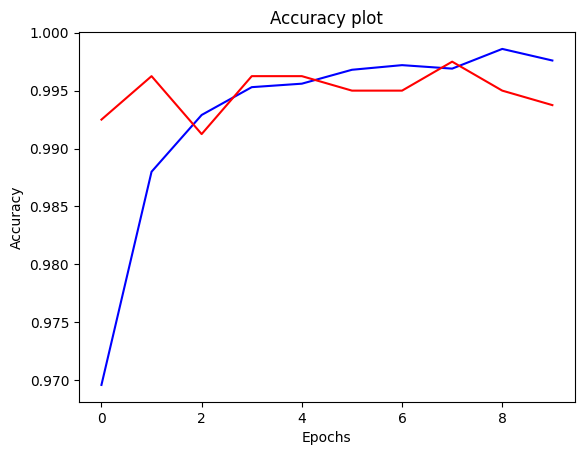

In [48]:
acc, val_acc = history.history['acc'], history.history['val_acc']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = ([x for x in range(1,11)])

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy plot')
plt.show()

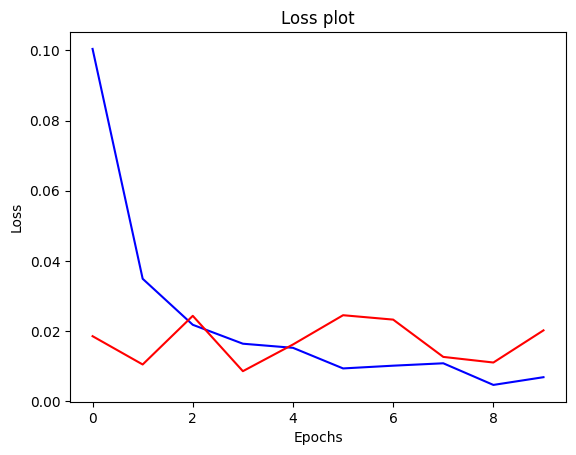

In [49]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss plot')
plt.show()